In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\ancha\\OneDrive\\Desktop\\py\\student-mat.csv",sep=';')

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
df.columns = df.columns.str.strip()

In [8]:
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [9]:
print("Missing value in each column:\n", df.isnull().sum())

Missing value in each column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [10]:
print("\nColumn data types:\n", df.dtypes)


Column data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [11]:
print("\nDaraset shape:", df.shape)


Daraset shape: (395, 33)


In [12]:
df = df.drop_duplicates()

In [13]:
df = df.fillna(df.median(numeric_only=True))

In [14]:
print("data cleaned. New shape:", df.shape)

data cleaned. New shape: (395, 33)


In [15]:
#Data Analysis
#1.Average final grade (G3)
avg_g3 = df['G3'].mean()
print(f"1.Average final grade (G3): {avg_g3:.2f}")

1.Average final grade (G3): 10.42


In [16]:
#2.Count of students scoring above 15
above_15 = df[df['G3'] > 15].shape[0]
print(f"2. Number of students scoring above 15 in G3: {above_15}")

2. Number of students scoring above 15 in G3: 40


In [17]:
#3.Correlation between study time and G3
correlation = df['studytime'].corr(df['G3'])
print(f"3. Correlation between study time and G3: {correlation:.2f}")

3. Correlation between study time and G3: 0.10


In [18]:
#4.Average G3 by gender
avg_by_gender = df.groupby('sex')['G3'].mean()
print("4. Average G3 by gender:\n", avg_by_gender)

4. Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


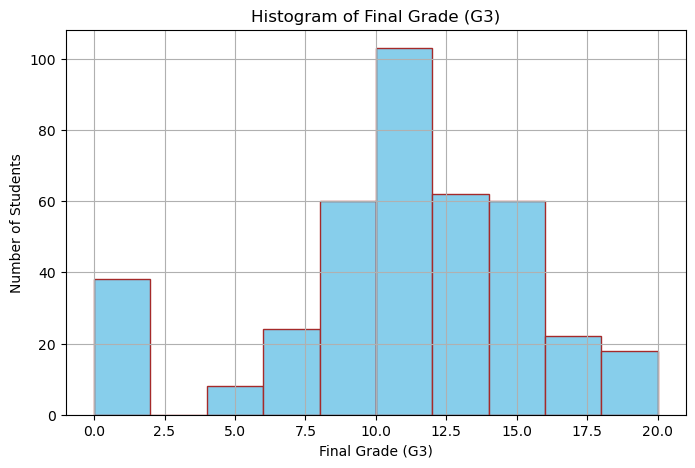

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='brown')
plt.title("Histogram of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

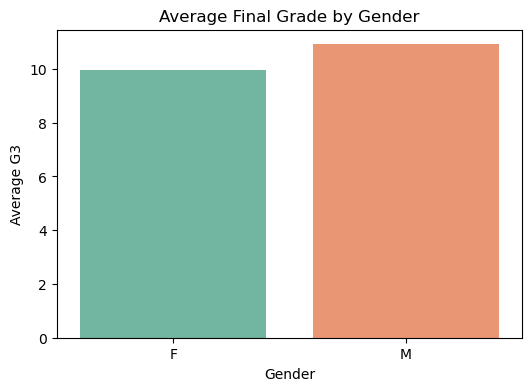

In [20]:
avg_by_gender_df = df.groupby('sex', as_index=False)['G3'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_by_gender_df, x='sex', y='G3', hue='sex', palette='Set2', legend=False)
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.show()
